In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [114]:
features = pd.read_csv('pop_features_minmax.csv',index_col=0)
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.042306,0.708680,0.240579,0.553440,0.000000,0.095424,0.804894,0.080418,0.747892,0.323032
1,0.163814,0.835910,0.182291,0.538181,0.000002,0.090141,0.735435,0.180709,0.346432,0.375591
2,0.580902,0.707491,0.223771,0.316427,0.000000,0.076826,0.625268,0.349216,0.175623,0.306213
3,0.149744,0.840666,0.273561,0.360168,0.000000,0.269788,0.593354,0.294596,0.484186,0.457584
4,0.558791,0.749108,0.194427,0.477148,0.000000,0.057698,0.795541,0.028007,0.288917,0.930621


In [116]:
features = features.drop(['instrumentalness','liveness','valence'],axis=1)

In [117]:
labels = pd.read_csv('pop_labels.csv',index_col=0)
labels.head()

,target
0,1
1,1
2,1
3,1
4,1


In [118]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

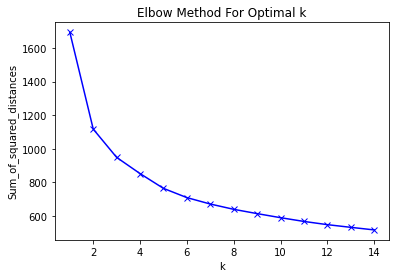

In [119]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [120]:
clustering_kmeans = KMeans(n_clusters=4)
cluster = clustering_kmeans.fit_predict(features)

In [121]:
features.head()

,acousticness,danceability,duration_ms,energy,loudness,speechiness,tempo
0,0.042306,0.708680,0.240579,0.553440,0.804894,0.080418,0.747892
1,0.163814,0.835910,0.182291,0.538181,0.735435,0.180709,0.346432
2,0.580902,0.707491,0.223771,0.316427,0.625268,0.349216,0.175623
3,0.149744,0.840666,0.273561,0.360168,0.593354,0.294596,0.484186
4,0.558791,0.749108,0.194427,0.477148,0.795541,0.028007,0.288917


In [122]:
cluster = pd.DataFrame(cluster,columns=['cluster'])
cluster.head()

,cluster
0,2
1,0
2,1
3,0
4,1


In [123]:
reduced_data = PCA(n_components=2).fit_transform(features)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

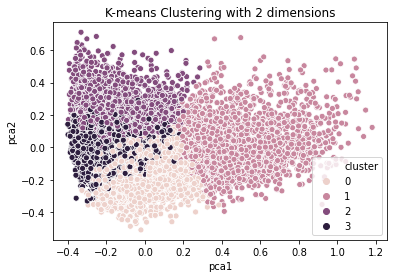

In [124]:
sns.scatterplot(x="pca1", y="pca2", hue=cluster['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

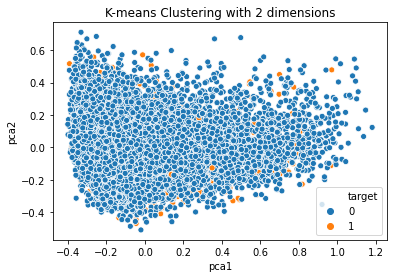

In [125]:
sns.scatterplot(x="pca1", y="pca2", hue=labels['target'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [53]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,genre_A Capella,...,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,cluster
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.368,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.390,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [126]:
combined = features
combined['target'] = labels['target']
combined['cluster'] = cluster['cluster']

In [127]:
combined.head()

,acousticness,danceability,duration_ms,energy,loudness,speechiness,tempo,target,cluster
0,0.042306,0.708680,0.240579,0.553440,0.804894,0.080418,0.747892,1,2
1,0.163814,0.835910,0.182291,0.538181,0.735435,0.180709,0.346432,1,0
2,0.580902,0.707491,0.223771,0.316427,0.625268,0.349216,0.175623,1,1
3,0.149744,0.840666,0.273561,0.360168,0.593354,0.294596,0.484186,1,0
4,0.558791,0.749108,0.194427,0.477148,0.795541,0.028007,0.288917,1,1


In [128]:
c0 = combined[combined['cluster']==0]
c1 = combined[combined['cluster']==1]
c2 = combined[combined['cluster']==2]
c3 = combined[combined['cluster']==3]

In [129]:
c0 = c0.drop(['cluster'],axis=1)
c1 = c1.drop(['cluster'],axis=1)
c2 = c2.drop(['cluster'],axis=1)
c3 = c3.drop(['cluster'],axis=1)

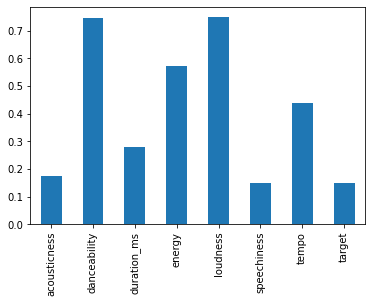

In [130]:
c0.mean().plot(kind='bar')

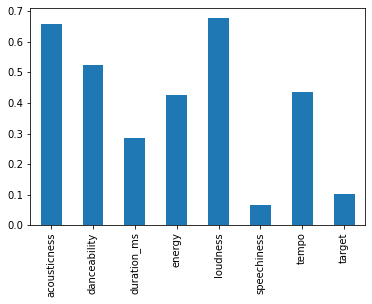

In [131]:
c1.mean().plot(kind='bar')

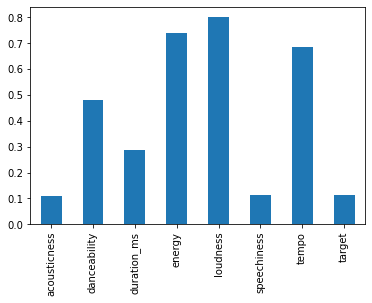

In [132]:
c2.mean().plot(kind='bar')

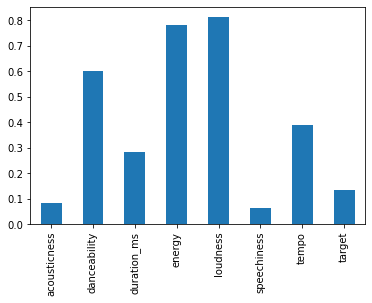

In [133]:
c3.mean().plot(kind='bar')

In [134]:
c0.mean()

acousticness    0.173405
danceability    0.746323
duration_ms     0.281122
energy          0.571511
loudness        0.748596
speechiness     0.150304
tempo           0.438498
target          0.151087
dtype: float64

In [135]:
c1.mean()

acousticness    0.656497
danceability    0.524188
duration_ms     0.285969
energy          0.425818
loudness        0.676881
speechiness     0.066093
tempo           0.435178
target          0.101425
dtype: float64

In [136]:
c2.mean()

acousticness    0.108960
danceability    0.480159
duration_ms     0.286698
energy          0.739300
loudness        0.800371
speechiness     0.114587
tempo           0.683818
target          0.112829
dtype: float64

In [137]:
c3.mean()

acousticness    0.083252
danceability    0.602149
duration_ms     0.283607
energy          0.782685
loudness        0.812796
speechiness     0.064377
tempo           0.391214
target          0.136126
dtype: float64

In [138]:
features.head()

,acousticness,danceability,duration_ms,energy,loudness,speechiness,tempo,target,cluster
0,0.042306,0.708680,0.240579,0.553440,0.804894,0.080418,0.747892,1,2
1,0.163814,0.835910,0.182291,0.538181,0.735435,0.180709,0.346432,1,0
2,0.580902,0.707491,0.223771,0.316427,0.625268,0.349216,0.175623,1,1
3,0.149744,0.840666,0.273561,0.360168,0.593354,0.294596,0.484186,1,0
4,0.558791,0.749108,0.194427,0.477148,0.795541,0.028007,0.288917,1,1


In [139]:
features_trimmed = features.drop(['target','cluster'],axis=1)

In [140]:
features_trimmed.to_csv('pop_features_minmax_trimmed.csv')